**Uso de uma Rede Neural Recorrente, para prever investimentos na bolsa de valores**

A base de dados representa investimentos nas ações da Petrobas na bolsa de valores, com o histórico do ano de 2013 ao ano de 2018.

Você pode encontrar a base de dados, em:

https://br.investing.com/equities/petrobras-pn-historical-data

Importações iniciais

In [174]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

Carregando da base de dados de treinamento

In [124]:
dataFrame = pd.read_csv('petr4_treinamento.csv')

A base de treino é composta pelas seguintes features:

* Date - Referente à data de abertura da ação;

* Open - Referente ao valor na abertura da ação;

* High - Referente ao valor máximo da ação;

* Low - Referente ao valor mínimo da ação;

* Close - Referente ao valor que a ação foi fechada;

* Adj Close - Referente ao valor real previsto pela ação;

* Volume - Total de investimentos

In [125]:
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
5,2013-01-09,19.639999,19.870001,19.459999,19.680000,18.077084,24361100.0
6,2013-01-10,19.770000,20.049999,19.540001,19.830000,18.214869,17526200.0
7,2013-01-11,19.850000,20.040001,19.700001,19.879999,18.260794,18223600.0
8,2013-01-14,20.010000,20.240000,19.690001,19.719999,18.113827,28302400.0
9,2013-01-15,20.010000,20.240000,19.690001,19.820000,18.205681,29633900.0


**Pré-processamento dos dados**

Em relação ao valores NaN, podemos realizar três ações:

* Exclução desses valores
* Substituição por 0
* Substituir pela média de cada coluna

In [126]:
dataFrame.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

Visto que a quantidade de valores do tipo NaN é relativamente baixa em relação aos 1245 dados do data set, podemos optar por apagar esses registros.

In [127]:
dataFrame = dataFrame.dropna()

In [128]:
dataFrame.shape

(1242, 7)

Dessa forma, podemos verificar se a função dropna(), conseguiu apagar estes valores nulos:

In [129]:
dataFrame.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Para treinarmos nosso modelo, podemos escolher uma das features temporais, que possa nos auxiliar na nossa target(alvo do modelo):

* Nesse contexto, optei por escolher a feature ***Open*** referente à abertura da ação.

In [130]:
base_treinamento = dataFrame.iloc[:,1:2].values

In [131]:
print(base_treinamento)

[[19.99    ]
 [19.809999]
 [20.33    ]
 ...
 [15.99    ]
 [16.1     ]
 [16.1     ]]


Nosso modelo trabalha com valores reais, podemos dizer assim. Dessa forma, podemos encontrar valores muito altos, que podem influenciar no treinamento. Para resolver essa problemática, podemos escolher duas opções:

* Normalização dos dados

* Padronização dos dados

Ambas as técnicas trabalham com o um único objetivo: deixar os dados na mesma grandeza. Para isso, veremos como cada uma trabalha, de forma individual:

**Normalização**

![Min-Max fórmula](https://miro.medium.com/max/202/1*9N7QdpE_CfvkTyirk7_oWw.png)

**Padronização**

<img src="https://d1whtlypfis84e.cloudfront.net/guides/wp-content/uploads/2020/04/04155631/1426878678.png " alt="drawing" width="150"/>

Neste modelo, vamos utilizar a técnica de **Normalização**, visto a tratar os outliers nos nossos dados.

In [132]:
from sklearn.preprocessing import MinMaxScaler

Para normalizar esse dados, vamos utilizar a função MinMaxScaler(), que irá transformar os dados em uma escala de 0 e 1.

In [133]:
normalizador = MinMaxScaler(feature_range = [0,1])

In [134]:
base_treinamento_normalizer = normalizador.fit_transform(base_treinamento)

In [135]:
base_treinamento_normalizer

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

**Estrutura da base para previsão temporal I**

Quando trabalha-se com dados temporais é preciso definir um intervalo de tempo entre os dados e o alvo. Neste caso, podemos pegar um registro que tenha registros anteriores. 

Exemplo: 

| Dia da semana | Dia | Preço |
|---------------|-----|-------|
| Quinta-feira  | 03  | 19,99 |
| Sexta-feira   | 04  | 19,80 |
| Segunda-feira | 07  | 20,33 |
| Terça-feira   | 08  | 20,48 |
| Quarta-feira  | 09  | 20,11 |

Para prever o preço da Quarta-feira, dia 09, precisamos pegar os valores das 4 datas anteriores:

| **Previsores** |   **Preço real**|
|---------------|-----|
| 19,99 19,80 20,33 20,48 20,11  | 20,11  |


**Estrutura da base para previsão temporal II**

* Prever o preço real através do 90 valores anteriores

In [136]:
previsores = []
preco_real = []

for i in range(90, 1242):
    previsores.append(base_treinamento_normalizer[i-90:i, 0])
    preco_real.append(base_treinamento_normalizer[i, 0])

In [137]:
previsores, preco_real = np.array(previsores), np.array(preco_real)

In [138]:
previsores.shape

(1152, 90)

Com a utilização da biblioteca Keras, nosso vetor de entradas precisa manter uma dimensão 3D com o formato:

                (batch_size, timesteps, input_dim)
Sendo:

* Batch_size - refere-se ao número de exemplos de treinamento usados em uma intereção

* Timesteps - refere-se a descrição da forma dos dados

* Input_dim - refere-se ao número de entradas

In [139]:
previsores = np.reshape(previsores, (previsores.shape[0],previsores.shape[1],1))

**Estrutura da Rede Neural Recorrente**

In [140]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (previsores.shape[1],1)))
regressor.add(Dropout(0.3))

In [141]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [142]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [143]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [144]:
regressor.add(Dense(units = 1,activation = 'linear'))

In [145]:
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
                  metrics = ['mean_squared_error'])

In [146]:
regressor.fit(previsores, preco_real, epochs = 100, batch_size = 32)

Epoch 1/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 2/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 3/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 4/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 5/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 6/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 7/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 8/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 9/100
1152/1152 [==============================] - 7s 6ms/step - loss: 0.0072 - mean_squar

1152/1152 [==============================] - 8s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 73/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 74/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 75/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 76/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 77/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 78/100
1152/1152 [==============================] - 9s 8ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 79/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 80/100
1152/1152 [==============================] - 8s 7ms/step - loss: 0.0018 - mean_squared_e

**Previsão de preços de açẽs**

Carregando da base de dados

In [147]:
base_teste = pd.read_csv('petr4_teste.csv')

In [148]:
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


Como estamos fazendo o uso apenas da feature **Open**, vamos extrai-la:

In [149]:
preco_real_teste = base_teste.iloc[:,1:2].values

Precisamos trabalhar com tipos de dados iguais, para evitar erros com a nossa Rede Neural Recorrente, para isso vamos concatenar as suas bases(treino e teste), para facilitar igualdade de tipos.

In [150]:
base_completa = pd.concat((dataFrame['Open'], base_teste['Open']), axis = 0)

In [151]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [152]:
entradas.shape

(112,)

Vamos utilizar a função reshape, para remodelar nosso vetor numpy.

In [153]:
entradas = entradas.reshape(-1,1)

In [154]:
entradas.shape

(112, 1)

Em seguida, colocaremos nossos dados na mesma escala.

In [155]:
entradas = normalizador.transform(entradas)

In [156]:
entradas

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

Precisamos colocar nossos dados de teste em uma lista. Dessa forma, iremos preencher nosso vetor X_teste.

In [157]:
X_teste = []
for i in range(90,112):
    X_teste.append(entradas[i-90:i, 0])

X_teste = np.array(X_teste)

In [158]:
X_teste.shape

(22, 90)

In [160]:
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [161]:
X_teste.shape

(22, 90, 1)

Agora, iremos realizar nossas previções:

In [162]:
previsoes = regressor.predict(X_teste)

Para visualizarmos as previsoes, iremos fazer um processo inverso à normalização. Dessa forma, iremos visualizar os preços em escalas reais ao início. 

In [163]:
previsoes = normalizador.inverse_transform(previsoes)

In [164]:
previsoes

array([[16.060324],
       [16.11508 ],
       [16.33288 ],
       [16.61174 ],
       [16.64482 ],
       [16.64558 ],
       [16.845572],
       [16.867891],
       [16.815756],
       [16.903109],
       [17.137545],
       [17.237164],
       [17.61667 ],
       [18.053425],
       [18.134068],
       [18.079782],
       [18.166327],
       [18.232475],
       [18.873707],
       [19.280882],
       [19.352222],
       [19.414549]], dtype=float32)

In [165]:
preco_real_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

Podemos observar que as previsões não ficaram distantes aos valores reais. Dessa maneira, podemos visualizar a média das previsoes e a média do preço real:

In [167]:
previsoes.mean()

17.519163

In [168]:
preco_real_teste.mean()

17.87454563636364

In [172]:
diferenca = preco_real_teste.mean() - previsoes.mean()
print(diferenca)

0.3553825046497714


Para visualizarmos o quanto as previsoes puderam se aproximar dos valores reais, podemos fazer um gráfico com ambos os vetores. Para isso, vamos utilizar a biblioteca **matplotlib**, para plotar esses valores.

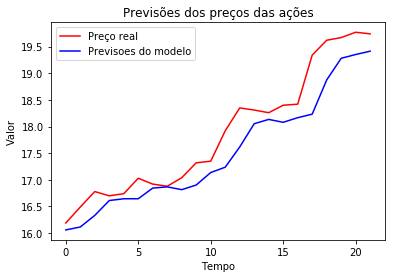

In [176]:
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsoes do modelo')
plt.title('Previsões dos preços das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

**Referências**

https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/learn/lecture/10897310#questions

https://translate.googleusercontent.com/translate_c?depth=1&hl=pt-BR&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://stackoverflow.com/questions/38714959/understanding-keras-lstms&usg=ALkJrhgwRgxszeum-5XuG2HTiE0KM75Wog

https://www.google.com/search?q=LSTM&client=ubuntu&hs=DAN&channel=fs&sxsrf=ALeKk02TzfQeiFwQ3Hw3VX9kUWN9kBiJ6g:1592424774740&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiBip7I1InqAhU0D7kGHfcuDHsQ_AUoAXoECA8QAw